# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [15]:
import numpy as np
amounts = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def mean(items):
    return sum(items)/len(items)

def variance(items):
    _mean = mean(items)
    return sum([(_mean-x)**2 for x in items])/len(items)

def std_dev(items):
    return variance(items)**.5

#check results
print(std_dev(amounts)== np.std(amounts))
print(mean(amounts)== np.mean(amounts))
print(variance(amounts)== np.var(amounts))
print('Mean: {}, Variance {}, Std. Dev: {}'.format(mean(amounts), variance(amounts), std_dev(amounts)))

True
True
True
Mean: 3052.714285714286, Variance 183761.06122448976, Std. Dev: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [37]:
import pandas as pd
df = pd.DataFrame({'sales_amount': amounts, 'customers':[127, 80, 105, 92, 120, 115, 93]})
print(np.cov(df['sales_amount'], df['customers']))
covariance = df.cov()['sales_amount']['customers']
print(covariance)
df.cov()


[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]
7604.357142857142


,sales_amount,customers
sales_amount,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [42]:
print(df['customers'].std())

corr = covariance / (df['customers'].std() * df['sales_amount'].std())

print(corr)
df.corr()

17.057326313123664
0.9628339778148909


,sales_amount,customers
sales_amount,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [51]:
df.cov()


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [52]:
df.cov()


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

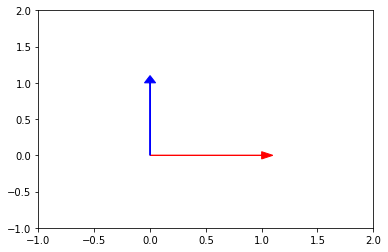

In [63]:
from matplotlib import pyplot as plt

v1 = np.array([1, 0])
v2 = np.array([0, 1])
plt.arrow(0, 0, *v1, head_width=.1, head_length=0.1, color='r')
plt.arrow(0, 0, *v2, head_width=.1, head_length=0.1, color='b')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()
# Perpendicular


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [66]:
a = np.array([-5, 3, 7]).T
b = np.array([6, -8, 2]).T

np.dot(a, b) == 0
# The dot product is not zero

False

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [68]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c) ** 2)
print(np.dot(c, c))
print(np.matmul(c.T, c))
# They all evaluate to the same value

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

*\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix}-8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}*

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [78]:
f = np.array([4,12,11,9,2])
unit_v_f = f/np.linalg.norm(f)
print(unit_v_f)

#checking.... 
print(sum([x**2 for x in f_unit]))
#close enough

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

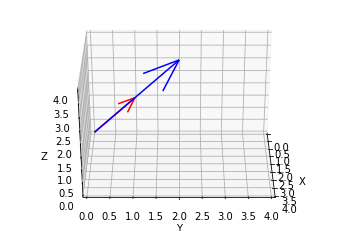

In [93]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML
# Dependent
g = np.array([1, 1, 2])
h = np.array([2, 2, 4])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *g, color='r')
ax.quiver(0, 0, 0, *h, color='b')
ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_zlim([0, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


def animate2(i):
    angle = i if i <= 90 else 90 - (i-90)
    ax.view_init(30, angle)
    return (fig,)


anim2 = animation.FuncAnimation(fig, animate2,
                                frames=180, interval=30, blit=True)

In [95]:
HTML(anim2.to_html5_video())

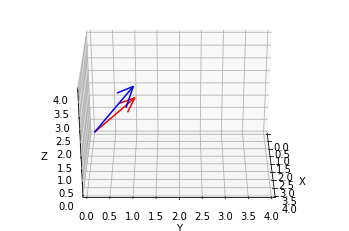

In [97]:
# Independent
g = np.array([1, 1, 2])
h = np.array([2, 1, 3])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *g, color='r')
ax.quiver(0, 0, 0, *h, color='b')
ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_zlim([0, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


def animate2(i):
    angle = i if i <= 90 else 90 - (i-90)
    ax.view_init(30, angle)
    return (fig,)


anim2 = animation.FuncAnimation(fig, animate2,
                                frames=180, interval=30, blit=True)

In [98]:
HTML(anim2.to_html5_video())

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [107]:
np.linalg.matrix_rank(np.array([[1,2],[4,8]]))
#R1/Collinear

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [106]:
np.linalg.matrix_rank(np.array([[1,2,3],[-1,0,7], [4,8,2]]))
#R3

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



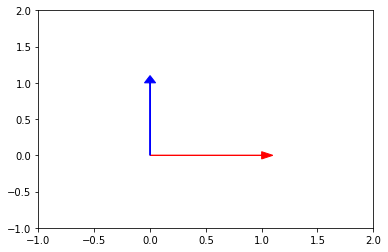

In [103]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])
plt.arrow(0, 0, *v1, head_width=.1, head_length=0.1, color='r')
plt.arrow(0, 0, *v2, head_width=.1, head_length=0.1, color='b')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

## 6.2 What does it mean to form a basis?

Linear combinations of the vectors spans the entire dimension space.


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [104]:
np.linalg.matrix_rank(np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]]))


3

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

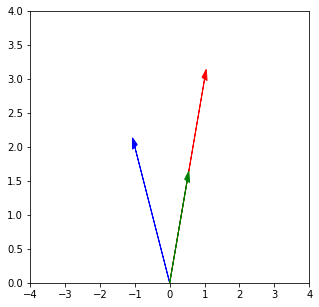

In [247]:
#squre graph
plt.figure(figsize=(5,5))
v = np.array([1, 3])
w = np.array([-1, 2])
#scalar formula
scalar = np.dot(w, v)/(np.dot(v, v))
proj = scalar*v

plt.arrow(0, 0, *v, head_width=.15, head_length=.15, color='red')
plt.arrow(0, 0, *w, head_width=.15, head_length=.15, color='blue')
plt.arrow(0, 0, *proj, head_width=.15, head_length=.15, color='green')

plt.xlim(-4, 4)
plt.ylim(0, 4)
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

   x  y  orth
0  1  4   2.5
1  4  2   3.0
2  7  5   6.0
3  3  0   1.5
4  9  8   8.5


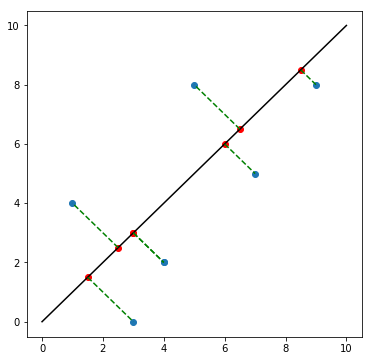

In [249]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]
#squre graph
plt.figure(figsize=(6,6))
data = {"x": x_values, "y": y_values}
df = pd.DataFrame(data)
df['orth'] = df.apply(lambda x: (x['x']+x['y'])/2, axis=1)
print(df.head())
x = np.linspace(0,10,10)
y = x

plt.scatter(df.x, df.y)
plt.scatter(df.orth, df.orth, color='red')
plt.plot(x, y, color='black')
plt.plot((df.orth,df.x), (df.orth,df.y), '--g')

plt.show()